In [1]:
import mbuild as mb
from openff.toolkit.topology import Molecule
import random
import numpy
import warnings
warnings.filterwarnings("ignore")

In [2]:
benzene = mb.load("c1ccsc1",smiles=True)
benzene.save("ben.sdf",overwrite=True)

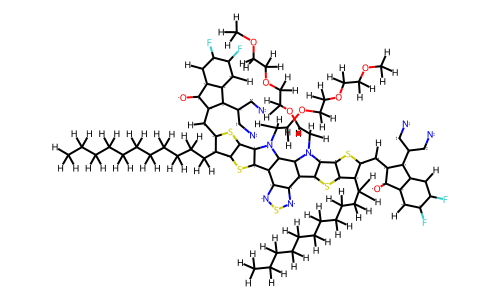

In [2]:
compound = Molecule.from_file("/Users/madilyn/Projects/repos/forcefields/bto.sdf",file_format = "sdf")
compound.visualize()

In [6]:
def walk_molecule(atom, mol, visited, happy):
    octet = {
        6 : 4,
        7 : 3,
        1 : 1,
        8 : 2,
        16 : 2}
    visited[atom.molecule_atom_index]=True
    bonds = [b for b in mol.bonds if atom.molecule_atom_index in [b.atom1_index,b.atom2_index]]
    current_order = numpy.sum([int(b.bond_order) for b in bonds])
    print("im on:",atom.molecule_atom_index,"current_order",current_order)
    if current_order < octet[atom.atomic_number]:
        add_order = 1
    if current_order > octet[atom.atomic_number]:
        add_order = -1
    if current_order == octet[atom.atomic_number]:
        add_order = 0
    print(add_order)
    for b in bonds:
        next_atom = b.atom1_index
        if b.atom1_index == atom.molecule_atom_index:
            next_atom = b.atom2_index
        print("next atom:",next_atom)
        if visited[next_atom] == False:
            #b.bond_order = current_order + add_order  #I think this is in the wrong place? 
            new_order = numpy.sum([int(b.bond_order) for b in bonds])
            #print("new_order:",new_order)
            walk_molecule(mol.atoms[next_atom],compound,visited,happy)

walk_molecule(compound.atoms[0],compound,[False]*len(compound.atoms),[False]*len(compound.atoms))

im on: 0 current_order 3
1
next atom: 1
im on: 1 current_order 3
1
next atom: 0
next atom: 2
im on: 2 current_order 3
1
next atom: 1
next atom: 3
im on: 3 current_order 3
1
next atom: 2
next atom: 4
im on: 4 current_order 3
1
next atom: 3
next atom: 5
im on: 5 current_order 3
1
next atom: 4
next atom: 0
next atom: 6
im on: 6 current_order 2
1
next atom: 5
next atom: 7
im on: 7 current_order 2
0
next atom: 6
next atom: 8
im on: 8 current_order 2
1
next atom: 7
next atom: 4
next atom: 8
next atom: 12
im on: 12 current_order 3
1
next atom: 3
next atom: 13
im on: 13 current_order 3
1
next atom: 14
im on: 14 current_order 3
0
next atom: 13
next atom: 2
next atom: 32
im on: 32 current_order 4
0
next atom: 14
next atom: 71
im on: 71 current_order 1
0
next atom: 32
next atom: 72
im on: 72 current_order 1
0
next atom: 32
next atom: 143
im on: 143 current_order 4
0
next atom: 32
next atom: 144
im on: 144 current_order 2
0
next atom: 143
next atom: 145
im on: 145 current_order 4
0
next atom: 144


KeyError: 9

In [14]:
bond_list = [b for b in compound.bonds if 1 not in [b.atom1.atomic_number, b.atom2.atomic_number]]
atom_list = [a for a in compound.atoms if 1 not in [a.atomic_number]]
def add_bonds(atom1_index, atom2_index, mol):
    change_bonds1 = [b for b in mol.bonds if atom1_index in [b.atom1_index,b.atom2_index]]
    change_bonds2 = [b for b in change_bonds1 if atom2_index in [b.atom1_index,b.atom2_index]]
    change_bond = change_bonds2[0]
    original_order = change_bond.bond_order
    change_bond.bond_order = original_order + 1
    print(change_bond.bond_order)
add_bonds(1,2,compound)
add_bonds(4,5,compound)
add_bonds(6,7,compound)
add_bonds(0,8,compound)

2
2
2
2


In [ ]:
change_bonds = [b for b in compound.bonds if 0 in [b.atom1_index,b.atom2_index]]
change_bonds

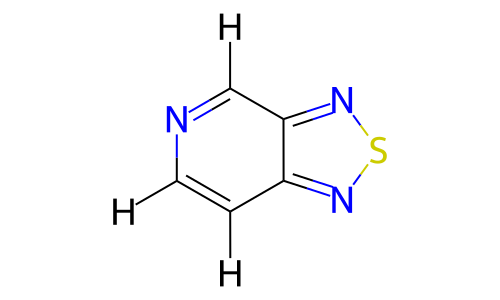

In [15]:
compound.visualize()

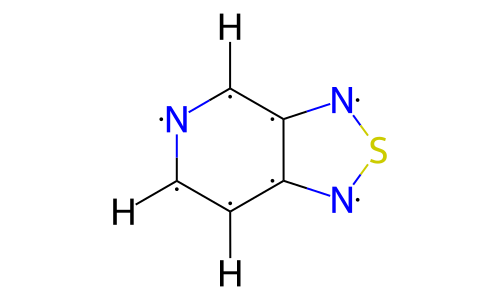

In [10]:
molecule = Molecule.from_file("pt.sdf",file_format = "sdf")
molecule.visualize()

In [11]:
walk_molecule(molecule.atoms[0],molecule,[False]*len(molecule.atoms),[False]*len(molecule.atoms))

im on: 0 current_order 3
1
next atom: 1
im on: 1 current_order 4
0
next atom: 0
next atom: 2
im on: 2 current_order 4
0
next atom: 1
next atom: 3
im on: 3 current_order 2
0
next atom: 2
next atom: 4
im on: 4 current_order 4
0
next atom: 0
next atom: 3
next atom: 8
im on: 8 current_order 1
0
next atom: 4
next atom: 7
im on: 7 current_order 1
0
next atom: 2
next atom: 6
im on: 6 current_order 1
0
next atom: 1
next atom: 8
next atom: 9
im on: 9 current_order 0.0
1
